In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

In [2]:
!git clone https://github.com/BWSI-UAV-2025/Week2_Vision.git

Cloning into 'Week2_Vision'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 62 (delta 0), reused 60 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 18.97 MiB | 16.68 MiB/s, done.


## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

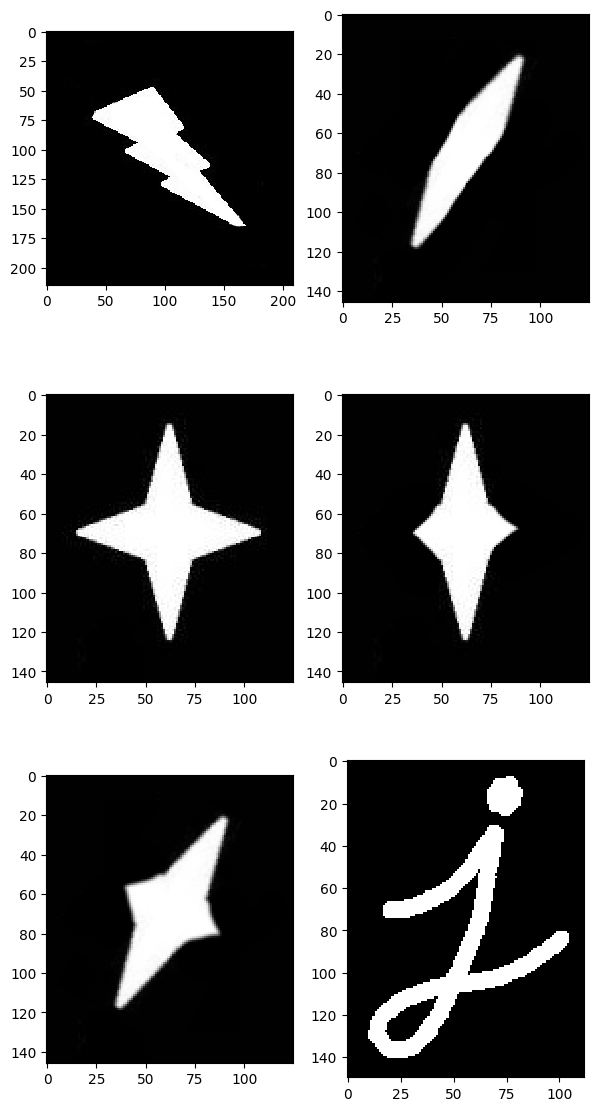

In [5]:
lightningbolt      = cv2.imread('/content/Week2_Vision/notebooks/shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('/content/Week2_Vision/notebooks/shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('/content/Week2_Vision/notebooks/shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('/content/Week2_Vision/notebooks/shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('/content/Week2_Vision/notebooks/shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('/content/Week2_Vision/notebooks/shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [7]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [8]:
# TODO
# Your Answer
I only expected there to be 2 different intensity values, however there are 75. Many in between pixels may be slighly off from fully black or fully white making the number of intensity values actually 75. It seems like when there is. atransition between white and black there is a pixel color that is slightly gray.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


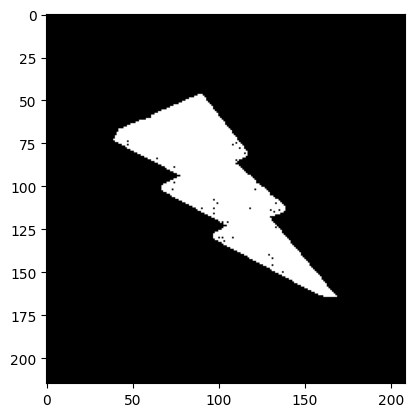

In [21]:
_, lightningbolt = cv2.threshold(lightningbolt,240,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [ ]:
## TODO
## Your answer
When the above values are used for thresholding, the image becomes much more defined with each pixel being either completely white or black. A good value could be 127 as that is directly in between 0 and 255, however for this image there is a large range of numbers between 0-255 that would work.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

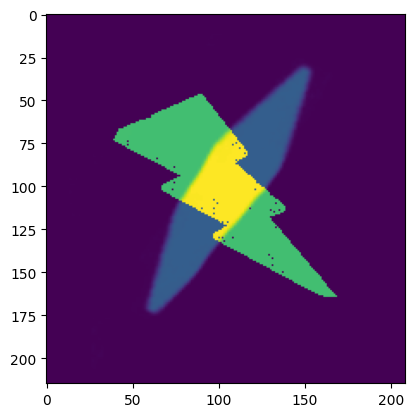

In [7]:
# 1. Blend
# TODO

#Had to resize the blob  for the addWeighted function to work
blob_resized = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
dst = cv2.addWeighted(lightningbolt,0.7,blob_resized,0.3,0)
plt.imshow(dst)

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

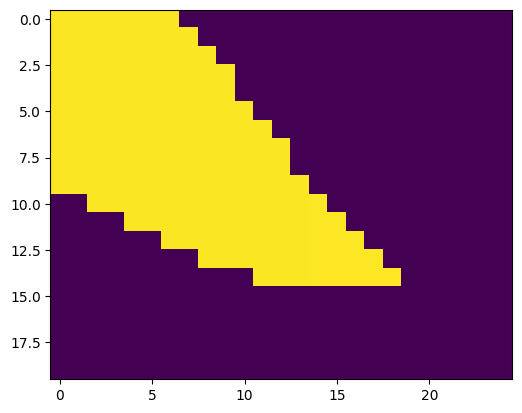

In [10]:
# 2. ROI
# TODO
point = dst[150:170, 150:175]
plt.imshow(point)


## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

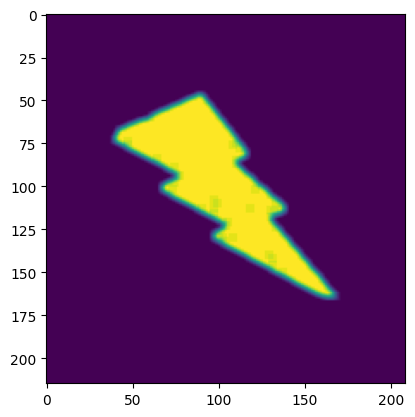

In [14]:
# 3.
# TODO

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(lightningbolt,-1,kernel)
plt.imshow(dst)

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

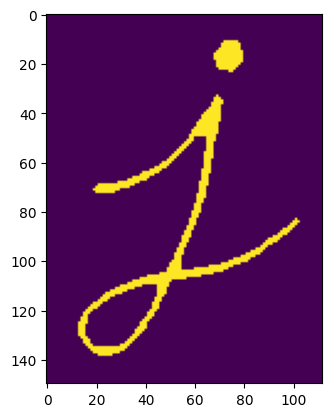

In [28]:
# 4
# TODO

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj ,kernel,iterations = 1)
plt.imshow(erosion)

## 5. Perform erosion on j with a 5x5 kernel

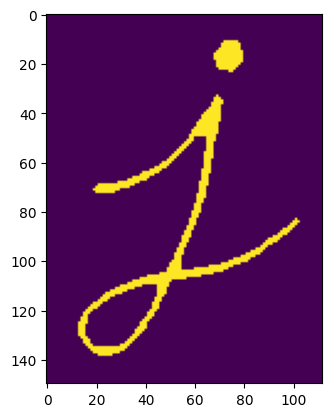

In [30]:
# 5
# TODO

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(letterj ,kernel,iterations = 1)
plt.imshow(erosion)

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



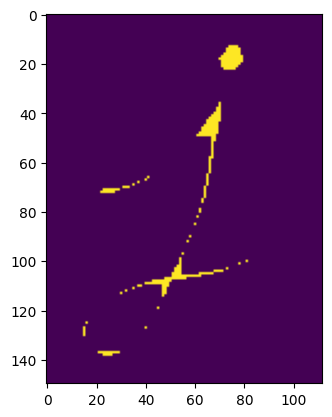

In [37]:
# 6
# TODO

kernel = np.ones((4,4),np.uint8)
erosion = cv2.erode(letterj ,kernel,iterations = 2)
plt.imshow(erosion)

## 7. Perform dilation on j with a 3x3 kernel

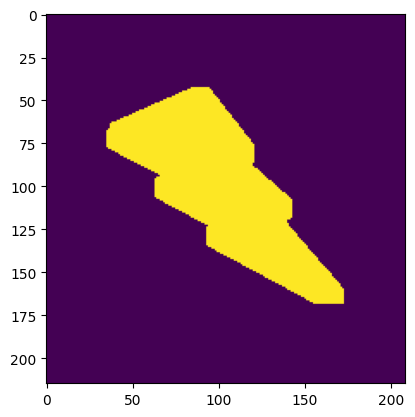

In [44]:
# 7
# TODO

kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(lightningbolt,kernel,iterations = 1)
plt.imshow(dilation)

## 8. Perform dilation on j with a 5x5 kernel

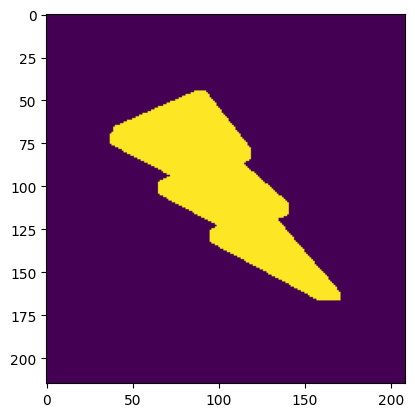

In [39]:
# 8
# TODO
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(lightningbolt,kernel,iterations = 1)
plt.imshow(dilation)


## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# TODO
The greater the kernel size the more dilation/erosion

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# TODO
The output will be relatively similar for both

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

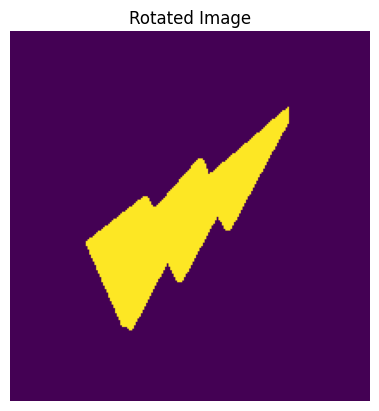

In [45]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL:

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options?

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

(Text(0.5, 1.0, 'Sobel Y'), ([], []), ([], []))

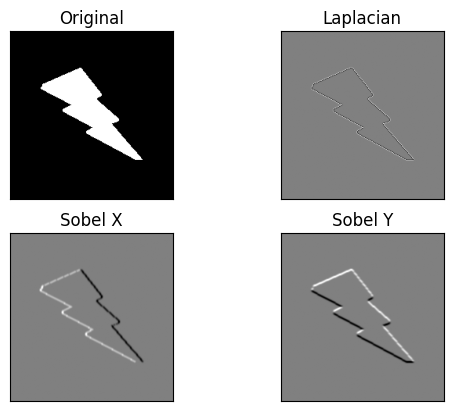

In [46]:
img = lightningbolt
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works`